### Поиск аномалий

**Инструкции**  

1. Выберете произвольный набор данных. Не обязательно с целевой переменной. Какой вам больше понравится.  
- возможно использование набора данных Cars Moldova, но он некоторым возможно надоел.   
- возможно использование данных связанных с вашими проектными работами и / или вашей работой (если разумеется этими данными можно делиться)  
- возможно использование наборов данных из открытых источников (OpenML, Kaggle). Основной критерий - достаточно много признаков и много данных. Условно от 5 различных признаков (без целевой переменной) и от 1000 строк данных. Примеры допустимых наборов данных (минус за креативность, что поделаешь):  
    * Прогнозирование оттока Клиентов https://www.kaggle.com/competitions/customer-churn-prediction-2020  
    * Кредитный скоринг https://www.openml.org/search?type=data&sort=runs&status=active&id=31  
    * Предсказание цены на дом https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques   
можно использовать данные из соревнования в предыдущем семестре  

2. Выполните импорт данных. Оцените типы имеющихся данных, проверьте наличие дубликатов и/или пропущенных значений. Выберите только числовые признаки. Блокноты которые вам помогут (рассмотрены ранее). 
https://colab.research.google.com/drive/1Yuj9zNdq3TVplffegiYXO6pQGuV3c10a?usp=sharing
3. Разделите данные на тренировочную и валидационную выборку.   
4. Выберите модель поиска аномалий. На выбор статистический EllepticEnvelope, метрический Local Outlier Factor, одноклассовый SVM и  Isolation Forest. Можно задействовать другие методы поиска аномалий, если они вам хорошо известны.   Пример использования тут https://colab.research.google.com/drive/1IHeF2SOlZPMs7itL3FETrco4uuy5xxGC?usp=sharing  

Дополнительно можете воспользоваться “классическими” методами (некоторые методы кластеризации, “генеративный подход” через метод главных компонент).  

5. Примените методы поиска аномалий на тренировочной выборке (Ситуация поиск Выбросов). Оптимизируйте гиперпараметры модели (в особенности гиперпараметр отвечающий за долю аномальных значений).  
Отдельно проанализируйте признаки данных которые считаются аномальными. 
6. Оцените полученную модель на тестовой выборке (Ситуация поиск Новизны).  
Сравните аномалии выделенные на тренировочной выборке и тестовой выборке.  
7. Загрузите ссылку (предварительно убедившись в открытом доступе) или ipynb файл (ура можно смотреть их прямо в MS Teams) своего решения в MS Teams   

Если копируете работу у кого-то то хотя бы поменяйте цветовые карты на графиках и перефразируйте выводы / комментарии. (или используйте другой random_state при разбиении данных)  
Если берете какие-то готовые решения из Kaggle то не поленитесь хотя бы перевести безпалевно)  

Блокнот необходимо прилежно оформить   
- хочется видеть структуру (Заголовки разного уровня);    
- ожидается видеть не только код, но и комментарии к нему;   
- не должно быть запущенных ячеек с ошибками;  
- ожидается что рисунки адекватно оформлены (не маленького размера, есть описание того, что на рисунке)  

### Импорт необходимых библиотек

In [10]:
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [11]:
from sklearn.datasets import make_moons, make_blobs # генерируемые наборы данных
from matplotlib.colors import ListedColormap # функция библиотеки Matplotlib, которая генерирует цветовую карту
from sklearn.inspection import DecisionBoundaryDisplay # Класс библиотеки scikit-learn для визуализации границ решений

In [12]:
# @title Функция для предварительной обработки текста { display-mode: "form" }
n_inliers = 0

def viz_anomaly(data, algorithm, colors, n_inliers = n_inliers, response_method="auto"):
    """Визуализация принятия решений и данных
    Входные переменные:
    ===========
    data: данные которые будем визуализировать
    algorithm: Класс модели машинного обучения для которого мы хотим узнать границы решений
    colors: цвета, которые будут использоваться для раскраски разных классов
    n_inliers: количество нормальных точек в штуках
    response_method: что визуализируем, результаты метода decision_function, predict_proba или predict. auto перебирает первый возможный вариант
    """

    cm_bright = ListedColormap(colors[::-1]) # формируем цветовую карту из наших цветов

    # отрисовываем границу принятия решений с помощью Класса библиотеки scikit-learn
    disp = DecisionBoundaryDisplay.from_estimator(
        algorithm, # Какой алгоритм используем
        data, # на каких данных проверяем
        response_method=response_method, # что визуализируе
        cmap=cm_bright, # какую цветовую карту используем
        alpha=0.5, #прозрачность
    )

    # визуализируем просто данные с помощью нашей функции
    plot_data(disp.ax_,data,n_inliers, colors = colors,)

def plot_data(ax,X,n_inliers,name='',marker = 'o',colors =("#FF0000", '#0000FF'),alpha=0.7, s = 150, facecolor=True):
    """Визуализация двумерных  данных для поиска аномалий
    Входные переменные:
    ===========
    ax: отдельная ячейка объекта figure
    X: набор данных, содержащий признаки X
    n_inliers: количество нормальных данных
    name: название графика
    marker: тип маркера - по умолчанию просто круги
    colors: цвета, которые будут использоваться для раскраски разных классов - по умолчанию Красный и Синий
    alpha: прозрачность маркеров
    s: размер маркера (~ квадрат радиуса)
    facecolor:
    """


    ax.set_title(name, fontsize = 30) # прописываем название графика
    ax.scatter(X[:n_inliers, 0], X[:n_inliers, 1],
                marker = marker, c=colors[0],
                s = s,
                alpha =alpha)
    ax.scatter(X[n_inliers:, 0], X[n_inliers:, 1],
            marker = marker, c=colors[1],
            s = s,
            alpha =alpha)
    # немного красоты и аккуратности



    ax.set_xticks(())
    ax.set_yticks(())

### Описание датасета

**Diabetes Health Indicators Dataset**  

Context

Diabetes is a chronic health condition that affects how your body turns food into energy. There are three main types of diabetes: type 1, type 2, and gestational diabetes.

Type 1 diabetes is an autoimmune disease that causes your body to attack the cells in your pancreas that produce insulin. Insulin is a hormone that helps your body use glucose for energy.

Type 2 diabetes is the most common type of diabetes. It occurs when your body doesn't respond normally to insulin, or when your body doesn't produce enough insulin.

Gestational diabetes is a type of diabetes that develops during pregnancy. It usually goes away after the baby is born.

Prevalence of Diabetes

According to the CDC BRFSS 2021, 34.1 million adults in the United States have diabetes, or 10.5% of the adult population. This number has been increasing over time. In 2010, 29.1 million adults in the United States had diabetes, or 9.3% of the adult population.

Content

The Behavioral Risk Factor Surveillance System (BRFSS) is an ongoing, state-based telephone survey that collects data about health-related risk behaviors, chronic health conditions, and the use of preventive services among adults aged 18 years and older residing in the United States. Conducted annually by the Centers for Disease Control and Prevention (CDC), the BRFSS has been providing valuable insights into the health status and behaviors of U.S. adults since its inception in 1984.

For this dataset, a csv of the 2021 BRFSS dataset available on Kaggle was used. The original dataset contains responses from 438,693 individuals and has 303 features. These features are either questions directly asked of participants, or calculated variables based on individual participant responses.

This dataset contains 3 files:

diabetes_012_health_indicators_BRFSS2021.csv is a clean dataset of 236,378 survey responses to the CDC's BRFSS2021. The target variable Diabetes_012 has 3 classes. 0 is for no diabetes or only during pregnancy, 1 is for prediabetes, and 2 is for diabetes. There is class imbalance in this dataset. This dataset has 21 feature variables.

diabetes_binary_5050split_health_indicators_BRFSS2021.csv is a clean dataset of 67,136 survey responses to the CDC's BRFSS2021. It has an equal 50-50 split of respondents with no diabetes and with either prediabetes or diabetes. The target variable Diabetes_binary has 2 classes. 0 is for no diabetes, and 1 is for prediabetes or diabetes. This dataset has 21 feature variables and is balanced.

diabetes_binary_health_indicators_BRFSS2021.csv is a clean dataset of 236,378 survey responses to the CDC's BRFSS2021. The target variable Diabetes_binary has 2 classes. 0 is for no diabetes, and 1 is for prediabetes or diabetes. This dataset has 21 feature variables and is not balanced.

Acknowledgements

It it important to reiterate that I did not create this dataset, it is just a cleaned and consolidated dataset created from the BRFSS 2021 dataset already on Kaggle. That dataset can be found here and the notebook I used for the data cleaning can be found here.

Inspiration

Alex Teboul for Cleaning the dataset for Machine Learning use by using the 2015 BRFSS was the inspiration for creating this dataset and exploring the BRFSS in general.

Ссылка на Kaggle: https://www.kaggle.com/datasets/julnazz/diabetes-health-indicators-dataset

### Загрузка данных

In [13]:
df = pd.read_csv('./Data/Diabet/diabetes_012_health_indicators_BRFSS2021.csv')

### Выделение числовых данных

In [16]:
df.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,0,1.0,1,15.0,1.0,0.0,0.0,0,1,...,1,0.0,5.0,10.0,20.0,0.0,0,11,4.0,5.0
1,2.0,1,0.0,1,28.0,0.0,0.0,1.0,0,1,...,1,0.0,2.0,0.0,0.0,0.0,0,11,4.0,3.0
2,2.0,1,1.0,1,33.0,0.0,0.0,0.0,1,1,...,1,0.0,2.0,10.0,0.0,0.0,0,9,4.0,7.0
3,2.0,0,1.0,1,29.0,0.0,1.0,1.0,1,1,...,1,0.0,5.0,0.0,30.0,1.0,1,12,3.0,4.0
4,0.0,0,0.0,1,24.0,1.0,0.0,0.0,0,0,...,1,0.0,3.0,0.0,0.0,1.0,1,13,5.0,6.0


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 236378 entries, 0 to 236377
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          236378 non-null  float64
 1   HighBP                236378 non-null  int64  
 2   HighChol              236378 non-null  float64
 3   CholCheck             236378 non-null  int64  
 4   BMI                   236378 non-null  float64
 5   Smoker                236378 non-null  float64
 6   Stroke                236378 non-null  float64
 7   HeartDiseaseorAttack  236378 non-null  float64
 8   PhysActivity          236378 non-null  int64  
 9   Fruits                236378 non-null  int64  
 10  Veggies               236378 non-null  int64  
 11  HvyAlcoholConsump     236378 non-null  int64  
 12  AnyHealthcare         236378 non-null  int64  
 13  NoDocbcCost           236378 non-null  float64
 14  GenHlth               236378 non-null  float64
 15  

In [18]:
df.columns

Index(['Diabetes_012', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

Оставляем только числовые признаки (все кроме первого и целевой переменной)

In [19]:
num_col = ['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income']

In [20]:
df_num = df[num_col]

### Основные метрики датасета

In [41]:
df.describe()

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,221994.000000,221994.000000,221994.000000,221994.000000,221994.000000,221994.000000,221994.000000,221994.000000,221994.000000,221994.000000,...,221994.000000,221994.000000,221994.000000,221994.000000,221994.000000,221994.000000,221994.000000,221994.000000,221994.000000,221994.000000
mean,0.430548,0.410043,0.961233,29.139612,0.427048,0.041384,0.091525,0.765800,0.606539,0.817946,...,0.960211,0.067853,2.528812,4.182158,3.991513,0.163694,0.475049,7.857956,5.101016,6.826581
std,0.495154,0.491842,0.193039,6.658425,0.494650,0.199177,0.288355,0.423499,0.488519,0.385890,...,0.195464,0.251494,1.030332,8.071731,8.450546,0.369998,0.499378,3.259802,0.952758,2.380650
min,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,1.000000,25.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,5.000000,4.000000,5.000000
50%,0.000000,0.000000,1.000000,28.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,1.000000,1.000000,1.000000,32.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,4.000000,3.000000,0.000000,1.000000,10.000000,6.000000,9.000000
max,1.000000,1.000000,1.000000,99.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,11.000000


### Поиск дубликатов

In [21]:
df_num.duplicated().sum()

14384

In [22]:
df = df_num.drop_duplicates().reset_index(drop=True)

## Работа с пропусками

In [25]:
df.isna().sum(axis = 0)

HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

In [26]:
df = df.dropna(axis = 0)

In [27]:
df = df.reset_index(drop=True)

### Разделение данные на тренировочную и валидационную выборку

In [28]:
X_train, X_test = train_test_split(df, test_size=0.2, random_state=42)

In [29]:
X_train.shape

(177595, 21)

In [30]:
X_test.shape

(44399, 21)

## Обнаружение аномалий

In [38]:
colors = np.array(["#7CFC00","#00BFFF"])

### 1. EllepticEnvelope

In [39]:
from sklearn.covariance import EllipticEnvelope

In [ ]:
['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income']

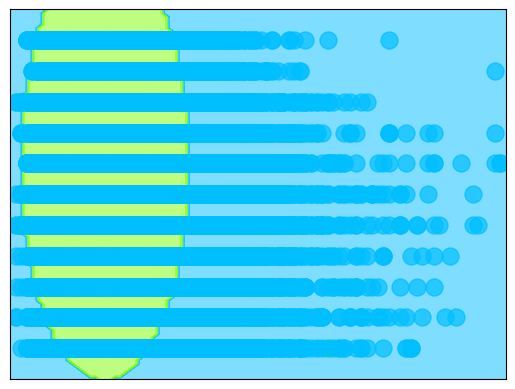

In [84]:
#@title ### **Гиперпараметры модели** { run: "auto" }
#@markdown ### доля аномальных значений
contamination = 0.05 #@param {type:"slider", min:0.00, max:0.5, step:0.05}
n_inliers = 1901 #@param {type:"slider", min:1, max:2001, step:100}
contamination+= 1e-6

# Создаем объект класса
ell_env = EllipticEnvelope(contamination=contamination)
# Обучаем модель
ell_env.fit(df[['BMI','Income']].values)

# визуализируем результат
viz_anomaly(df[['BMI','Income']].values, ell_env, colors, n_inliers = n_inliers, response_method="predict");

Интересно, но абсолютно непонятно :)

### Аномальных данных 5%

In [67]:
# Создаем объект класса
contamination = 0.05
ell_env_05 = EllipticEnvelope(contamination=contamination)

In [68]:
# Обучаем модель
ell_env_05.fit(X_train)

C:\Users\Mikhail\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\Mikhail\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\Mikhail\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


EllipticEnvelope(contamination=0.05)

In [69]:
print(ell_env_05.location_)

[3.89882121e-01 3.88685135e-01 1.00000000e+00 2.82815023e+01
 3.82068199e-01 2.71667832e-02 6.33444733e-02 1.00000000e+00
 6.45922110e-01 8.54647655e-01 6.26550096e-02 9.73599288e-01
 2.41312279e-02 2.20867767e+00 1.43970545e+00 5.86934664e-01
 6.76631970e-02 5.00177154e-01 7.77824168e+00 5.26181425e+00
 7.38684657e+00]


**Количество нормальных и аномальных точек**

In [70]:
fit_05 = ell_env_05.support_

In [71]:
unique_05, counts_05 = np.unique(fit_05, return_counts=True)
np.asarray((unique_05, counts_05)).T

array([[     0,  73166],
       [     1, 104429]], dtype=int64)

**Отрицательное расстояние Махаланобиса**

C:\Users\Mikhail\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\Mikhail\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\Mikhail\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


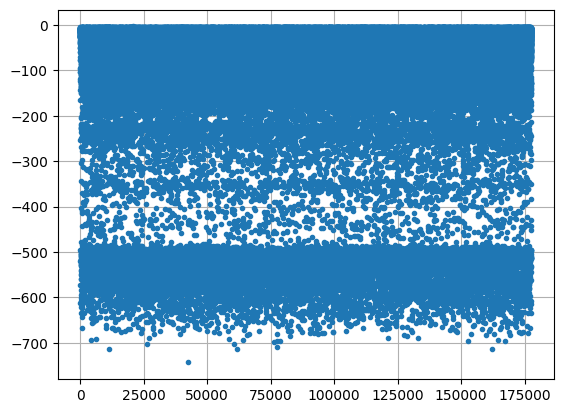

In [73]:
plt.plot(ell_env_05.score_samples(X_train),'.',)
plt.grid();

Точки наиболее удаленные от нуля, скорее всего являются аномалиями

**Поиск новизны**

In [74]:
pred_05 = ell_env_05.predict(X_test)

C:\Users\Mikhail\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\Mikhail\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\Mikhail\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


In [75]:
unique_05, counts_05 = np.unique(pred_05, return_counts=True)
np.asarray((unique_05, counts_05)).T

array([[   -1,  2324],
       [    1, 42075]], dtype=int64)

### Аномальных данных 10%

In [76]:
# Создаем объект класса
contamination = 0.1
ell_env_10 = EllipticEnvelope(contamination=contamination)

In [77]:
# Обучаем модель
ell_env_10.fit(X_train)

C:\Users\Mikhail\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\Mikhail\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\Mikhail\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


EllipticEnvelope()

In [78]:
print(ell_env_10.location_)

[ 0.40942563  0.39723357  1.         28.48357377  0.39088231  0.02963081
  0.06339537  0.83356206  0.62779489  0.84643192  0.05726168  0.96977507
  0.0385008   2.25038492  0.98733097  0.45522326  0.08543647  0.49560684
  7.98092114  5.1946211   7.22790869]


Из-за увеличенной доли аномалий средние немного сместились:

**Количество нормальных и аномальных точек**

In [79]:
fit_10 = ell_env_10.support_

In [80]:
unique_10, counts_10 = np.unique(fit_10, return_counts=True)
np.asarray((unique_10, counts_10)).T

array([[     0,  58091],
       [     1, 119504]], dtype=int64)

**Отрицательное расстояние Махаланобиса:**

C:\Users\Mikhail\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\Mikhail\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\Mikhail\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


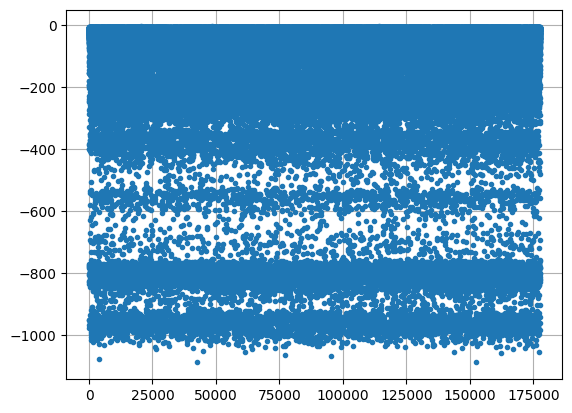

In [81]:
plt.plot(ell_env_10.score_samples(X_train),'.',)
plt.grid();

Точки наиболее удаленные от нуля, скорее всего являются аномалиями

**Поиск новизны**

In [82]:
pred_10 = ell_env_10.predict(X_test)

C:\Users\Mikhail\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\Mikhail\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\Mikhail\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


In [83]:
unique_10, counts_10 = np.unique(pred_10, return_counts=True)
np.asarray((unique_10, counts_10)).T

array([[   -1,  4547],
       [    1, 39852]], dtype=int64)

### Проанализируем аномальные точки при доле в 10%

#### Для тренировочных данных

In [85]:
X_train_ell = X_train.copy()

In [86]:
X_train_ell.describe()

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,177595.000000,177595.000000,177595.000000,177595.000000,177595.000000,177595.000000,177595.000000,177595.000000,177595.000000,177595.000000,...,177595.000000,177595.000000,177595.000000,177595.000000,177595.000000,177595.000000,177595.000000,177595.000000,177595.000000,177595.000000
mean,0.430322,0.409893,0.960928,29.139756,0.427039,0.041820,0.091754,0.765055,0.607252,0.817664,...,0.960151,0.067524,2.527464,4.159548,3.975613,0.163833,0.474935,7.861218,5.102858,6.826667
std,0.495123,0.491815,0.193767,6.653188,0.494649,0.200178,0.288679,0.423965,0.488363,0.386122,...,0.195605,0.250929,1.029621,8.048555,8.434362,0.370125,0.499373,3.261952,0.951396,2.380035
min,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,1.000000,25.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,5.000000,4.000000,5.000000
50%,0.000000,0.000000,1.000000,28.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,1.000000,1.000000,1.000000,32.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,4.000000,3.000000,0.000000,1.000000,10.000000,6.000000,9.000000
max,1.000000,1.000000,1.000000,99.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,11.000000


In [87]:
# добавим колонку, показывающую является ли точка аномалией
X_train_ell['is_normal'] = fit_10

In [88]:
X_train_ell

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,is_normal
79301,0,0.0,1,28.0,0.0,0.0,0.0,1,1,0,...,0.0,1.0,0.0,0.0,0.0,0,5,6.0,7.0,True
200179,0,1.0,1,23.0,1.0,0.0,0.0,0,0,0,...,0.0,2.0,0.0,4.0,0.0,0,6,6.0,10.0,False
154860,0,0.0,1,36.0,0.0,0.0,0.0,1,1,1,...,0.0,2.0,0.0,0.0,0.0,0,5,6.0,11.0,True
171682,1,1.0,1,29.0,0.0,0.0,1.0,1,1,1,...,0.0,2.0,0.0,0.0,0.0,1,10,6.0,7.0,True
150682,0,0.0,1,64.0,0.0,0.0,0.0,0,1,1,...,0.0,3.0,0.0,0.0,0.0,0,5,1.0,3.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119879,0,0.0,1,29.0,1.0,0.0,0.0,1,1,1,...,0.0,2.0,0.0,0.0,0.0,0,5,6.0,7.0,True
103694,0,0.0,1,24.0,0.0,0.0,0.0,1,1,1,...,0.0,1.0,3.0,1.0,0.0,1,1,4.0,9.0,True
131932,0,0.0,1,32.0,1.0,0.0,0.0,1,1,0,...,0.0,3.0,1.0,0.0,0.0,1,6,5.0,6.0,True
146867,1,1.0,1,33.0,1.0,0.0,1.0,0,1,1,...,0.0,5.0,5.0,28.0,1.0,1,10,4.0,2.0,False


In [89]:
# Сделаем отдельные датафреймы для аномальных и нормальных точек:
X_train_ell_anomaly = X_train_ell.query('is_normal==False')
X_train_ell_normal = X_train_ell.query('is_normal==True')

**Сравним нормальные и аномальные точки**

In [90]:
X_train_ell_normal.describe()

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,119504.000000,119504.000000,119504.0,119504.000000,119504.000000,119504.000000,119504.000000,119504.000000,119504.000000,119504.000000,...,119504.000000,119504.000000,119504.000000,119504.000000,119504.000000,119504.000000,119504.000000,119504.000000,119504.000000,119504.000000
mean,0.409426,0.397234,1.0,28.483574,0.390882,0.029631,0.063395,0.833562,0.627795,0.846432,...,0.969775,0.038501,2.250385,0.987331,0.455223,0.085436,0.495607,7.980921,5.194621,7.227909
std,0.491730,0.489327,0.0,5.675692,0.487950,0.169567,0.243674,0.372475,0.483395,0.360536,...,0.171206,0.192403,0.848596,2.015411,1.086019,0.279531,0.499983,3.230430,0.901858,2.199319
min,0.000000,0.000000,1.0,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,1.0,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,5.000000,6.000000
50%,0.000000,0.000000,1.0,28.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,1.000000,1.000000,1.0,32.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,1.000000,0.000000,0.000000,1.000000,11.000000,6.000000,9.000000
max,1.000000,1.000000,1.0,57.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,11.000000,6.000000,1.000000,1.000000,13.000000,6.000000,11.000000


In [91]:
X_train_ell_anomaly.describe()

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,58091.000000,58091.000000,58091.000000,58091.000000,58091.000000,58091.000000,58091.000000,58091.000000,58091.000000,58091.000000,...,58091.000000,58091.000000,58091.000000,58091.000000,58091.000000,58091.000000,58091.000000,58091.000000,58091.000000,58091.000000
mean,0.473309,0.435937,0.880549,30.489646,0.501420,0.066895,0.150092,0.624124,0.564993,0.758482,...,0.940352,0.127231,3.097468,10.685390,11.217710,0.325111,0.432408,7.614966,4.914083,6.001239
std,0.499291,0.495883,0.324321,8.145546,0.500002,0.249842,0.357165,0.484352,0.495762,0.428007,...,0.236835,0.333235,1.129932,11.242743,11.709629,0.468420,0.495414,3.312311,1.020332,2.520830
min,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,1.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,5.000000,4.000000,4.000000
50%,0.000000,0.000000,1.000000,29.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,7.000000,7.000000,0.000000,0.000000,8.000000,5.000000,6.000000
75%,1.000000,1.000000,1.000000,34.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,...,1.000000,0.000000,4.000000,20.000000,20.000000,1.000000,1.000000,10.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,99.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,11.000000


**Выводы:**

Данных достаточно много, плюс дисперсии признаков небольшие, что затрудняет формулировку выводов.  
Тем не менее, основной, что бросилось в глаза, были убраны граничные значения по столбцам ментального и физического здоровья.  
По другим признакам отличий в "нормальной" и "аномальной" выборках не увидел.

#### Для тестовых данных

In [93]:
X_test_ell = X_test.copy()

In [94]:
X_test_ell.describe()

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,44399.000000,44399.000000,44399.000000,44399.000000,44399.000000,44399.000000,44399.000000,44399.000000,44399.000000,44399.000000,...,44399.000000,44399.000000,44399.000000,44399.000000,44399.000000,44399.000000,44399.000000,44399.000000,44399.000000,44399.000000
mean,0.431451,0.410640,0.962454,29.139035,0.427082,0.039641,0.090610,0.768779,0.603685,0.819073,...,0.960450,0.069168,2.534201,4.272596,4.055114,0.163134,0.475506,7.844906,5.093651,6.826235
std,0.495284,0.491956,0.190097,6.679406,0.494660,0.195115,0.287057,0.421618,0.489137,0.384962,...,0.194903,0.253743,1.033166,8.163243,8.514771,0.369492,0.499405,3.251192,0.958161,2.383132
min,0.000000,0.000000,0.000000,13.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,1.000000,25.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,5.000000,4.000000,5.000000
50%,0.000000,0.000000,1.000000,28.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,1.000000,1.000000,1.000000,32.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,5.000000,3.000000,0.000000,1.000000,10.000000,6.000000,9.000000
max,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,11.000000


In [95]:
# добавим колонку, показывающую является ли точка аномалией
X_test_ell['is_normal'] = pred_10

In [96]:
X_test_ell

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,is_normal
209227,0,0.0,1,32.0,0.0,0.0,0.0,1,1,1,...,0.0,2.0,0.0,0.0,0.0,1,9,4.0,10.0,1
221274,1,1.0,1,30.0,0.0,0.0,0.0,1,1,1,...,0.0,1.0,0.0,0.0,0.0,0,10,5.0,6.0,1
173885,0,0.0,1,25.0,0.0,0.0,0.0,1,1,1,...,0.0,1.0,0.0,0.0,0.0,0,12,4.0,8.0,1
189737,1,1.0,1,28.0,1.0,0.0,1.0,1,1,1,...,0.0,3.0,0.0,5.0,0.0,0,9,5.0,5.0,1
60211,1,0.0,1,29.0,0.0,0.0,0.0,1,1,1,...,0.0,2.0,0.0,5.0,0.0,0,7,6.0,7.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146208,1,0.0,1,60.0,0.0,0.0,0.0,0,0,1,...,0.0,3.0,0.0,0.0,0.0,1,6,5.0,4.0,1
116061,1,1.0,1,29.0,0.0,0.0,0.0,1,1,1,...,0.0,1.0,0.0,0.0,0.0,1,8,5.0,11.0,1
108448,0,0.0,1,41.0,0.0,0.0,0.0,1,1,1,...,0.0,3.0,0.0,0.0,0.0,0,4,6.0,5.0,1
59858,1,1.0,1,30.0,0.0,0.0,0.0,1,0,0,...,0.0,3.0,2.0,0.0,0.0,1,9,6.0,9.0,1


In [97]:
# Сделаем отдельные датафреймы для аномальных и нормальных точек:
X_test_ell_anomaly = X_test_ell.query('is_normal==-1')
X_test_ell_normal = X_test_ell.query('is_normal==1')

**Сравним аномальный и нормальный датафрейм:**

In [98]:
X_test_ell_normal.describe()

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,is_normal
count,39852.000000,39852.000000,39852.000000,39852.000000,39852.000000,39852.000000,39852.000000,39852.000000,39852.000000,39852.000000,...,39852.000000,39852.000000,39852.000000,39852.000000,39852.000000,39852.000000,39852.000000,39852.000000,39852.000000,39852.0
mean,0.411222,0.396718,0.960604,28.930443,0.409892,0.031617,0.075153,0.801265,0.606645,0.825931,...,0.059570,2.381687,3.396492,1.427783,0.113570,0.478847,7.744078,5.132415,6.995132,1.0
std,0.492061,0.489223,0.194537,6.420528,0.491820,0.174980,0.263641,0.399053,0.488501,0.379174,...,0.236692,0.918188,6.955964,3.185873,0.317293,0.499559,3.279303,0.939865,2.312075,0.0
min,0.000000,0.000000,0.000000,13.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.0
25%,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,...,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,5.000000,4.000000,6.000000,1.0
50%,0.000000,0.000000,1.000000,28.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,...,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000,1.0
75%,1.000000,1.000000,1.000000,32.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,...,0.000000,3.000000,3.000000,1.000000,0.000000,1.000000,10.000000,6.000000,9.000000,1.0
max,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,5.000000,30.000000,18.000000,1.000000,1.000000,13.000000,6.000000,11.000000,1.0


In [99]:
X_test_ell_anomaly.describe()

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,is_normal
count,4547.000000,4547.000000,4547.000000,4547.000000,4547.000000,4547.000000,4547.000000,4547.000000,4547.000000,4547.000000,...,4547.000000,4547.000000,4547.000000,4547.000000,4547.000000,4547.000000,4547.000000,4547.000000,4547.000000,4547.0
mean,0.608753,0.532659,0.978667,30.967231,0.577744,0.109963,0.226083,0.484055,0.577744,0.758962,...,0.153288,3.870904,11.951177,27.082252,0.597537,0.446228,8.728612,4.753904,5.345942,-1.0
std,0.488083,0.498987,0.144507,8.404063,0.493973,0.312878,0.418340,0.499801,0.493973,0.427760,...,0.360304,1.021461,12.687027,5.312480,0.490448,0.497155,2.844833,1.045975,2.482620,0.0
min,0.000000,0.000000,0.000000,13.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,-1.0
25%,0.000000,0.000000,1.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,3.000000,0.000000,25.000000,0.000000,0.000000,7.000000,4.000000,4.000000,-1.0
50%,1.000000,1.000000,1.000000,30.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,0.000000,4.000000,5.000000,30.000000,1.000000,0.000000,9.000000,5.000000,5.000000,-1.0
75%,1.000000,1.000000,1.000000,35.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,...,0.000000,5.000000,30.000000,30.000000,1.000000,1.000000,11.000000,6.000000,7.000000,-1.0
max,1.000000,1.000000,1.000000,91.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,11.000000,-1.0


Ситуация близка к аналогичной картине на тренировочной выборке

### 2. Isolation Forest

In [100]:
from sklearn.ensemble import IsolationForest

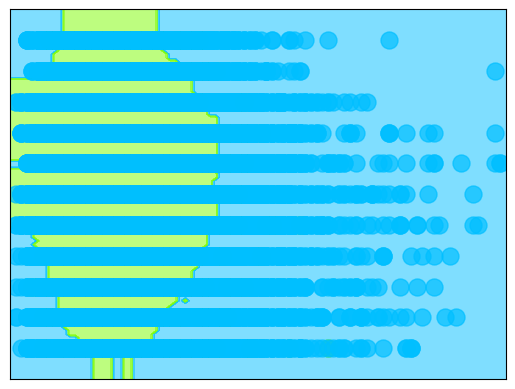

In [102]:
#@title **Гиперпараметры модели** { run: "auto" }
#@markdown ### доля аномальных значений
contamination = 0.05 #@param {type:"slider", min:0.00, max:0.5, step:0.05}
n_inliers = 2001 #@param {type:"slider", min:1, max:2001, step:100}
contamination+= 1e-6
#@markdown ### Количество деревьев
n_estimators =  50 #@param {type:"slider", min:25, max:250 , step:25}
#@markdown ### Фиксируем рандом
random_state=42 #@param {type:"integer"}



# Создаем объект класса
iso_forest = IsolationForest(contamination=contamination,
                            n_estimators = n_estimators,
                            random_state=42)
# Обучаем модель
iso_forest.fit(df[['BMI','Income']].values)

viz_anomaly(df[['BMI','Income']].values, iso_forest, colors, n_inliers = n_inliers, response_method="predict");

Картинка сильно похожая на предыдущий метод

Есть сильное подозрение, что это обусловлено данными в датасете

### Аномальных данных 5%

In [104]:
contamination = 0.05

# Количество деревьев
n_estimators =  225
# Фиксируем рандом
random_state=42

In [105]:
# Создаем объект класса
iso_forest_05 = IsolationForest(contamination=contamination,
                            n_estimators = n_estimators,
                            random_state=42)

In [106]:
# Обучаем модель
fit_05 = iso_forest_05.fit_predict(X_train.values)

**Посмотрим на количество нормальных и аномальных точек**

In [107]:
unique_05, counts_05 = np.unique(fit_05, return_counts=True)
np.asarray((unique_05, counts_05)).T

array([[    -1,   8880],
       [     1, 168715]], dtype=int64)

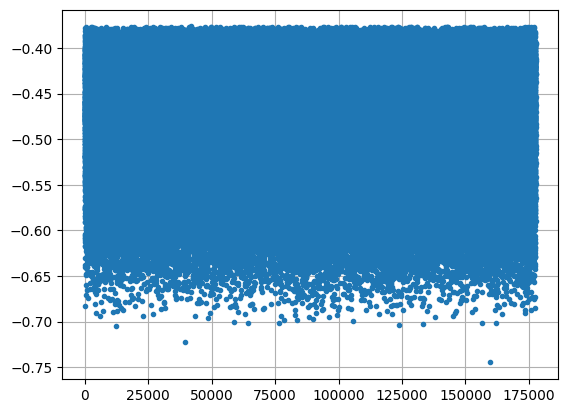

In [108]:
plt.plot(iso_forest_05.score_samples(X_train.values),'.',)
plt.grid();

Более плотно, но с другой стороны сильных аномалий не видно

**Поиск новизны**

In [109]:
pred_05 = iso_forest_05.predict(X_test.values)

In [110]:
unique_05, counts_05 = np.unique(pred_05, return_counts=True)
np.asarray((unique_05, counts_05)).T

array([[   -1,  2271],
       [    1, 42128]], dtype=int64)

### Аномальных данных 10%

In [111]:
contamination = 0.1

# Количество деревьев
n_estimators =  225
# Фиксируем рандом
random_state=42

In [112]:
# Создаем объект класса
iso_forest_10 = IsolationForest(contamination=contamination,
                            n_estimators = n_estimators,
                            random_state=42)

In [113]:
# Обучаем модель
fit_10 = iso_forest_10.fit_predict(X_train.values)

**Посмотрим на количество нормальных и аномальных точек**

In [114]:
unique_10, counts_10 = np.unique(fit_10, return_counts=True)
np.asarray((unique_10, counts_10)).T

array([[    -1,  17760],
       [     1, 159835]], dtype=int64)

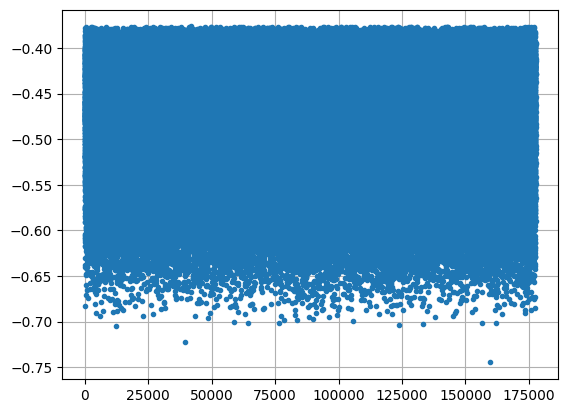

In [115]:
plt.plot(iso_forest_10.score_samples(X_train.values),'.',)
plt.grid();

**Поиск новизны**

In [116]:
pred_10 = iso_forest_10.predict(X_test.values)

In [117]:
unique_10, counts_10 = np.unique(pred_10, return_counts=True)
np.asarray((unique_10, counts_10)).T

array([[   -1,  4511],
       [    1, 39888]], dtype=int64)

### Проанализируем аномальные точки при доле в 10%

#### Для тренировочных данных

In [118]:
X_train_forest = X_train.copy()

In [119]:
X_train_forest.describe()

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,177595.000000,177595.000000,177595.000000,177595.000000,177595.000000,177595.000000,177595.000000,177595.000000,177595.000000,177595.000000,...,177595.000000,177595.000000,177595.000000,177595.000000,177595.000000,177595.000000,177595.000000,177595.000000,177595.000000,177595.000000
mean,0.430322,0.409893,0.960928,29.139756,0.427039,0.041820,0.091754,0.765055,0.607252,0.817664,...,0.960151,0.067524,2.527464,4.159548,3.975613,0.163833,0.474935,7.861218,5.102858,6.826667
std,0.495123,0.491815,0.193767,6.653188,0.494649,0.200178,0.288679,0.423965,0.488363,0.386122,...,0.195605,0.250929,1.029621,8.048555,8.434362,0.370125,0.499373,3.261952,0.951396,2.380035
min,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,1.000000,25.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,5.000000,4.000000,5.000000
50%,0.000000,0.000000,1.000000,28.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,1.000000,1.000000,1.000000,32.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,4.000000,3.000000,0.000000,1.000000,10.000000,6.000000,9.000000
max,1.000000,1.000000,1.000000,99.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,11.000000


In [120]:
# добавим колонку, показывающую является ли точка аномалией
X_train_forest['is_normal'] = fit_10

In [121]:
# Сделаем отдельные датафреймы для аномальных и нормальных точек
X_train_forest_anomaly = X_train_forest.query('is_normal==-1')
X_train_forest_normal = X_train_forest.query('is_normal==1')

**Сравним нормальные и аномальные точки**

In [122]:
X_train_forest_normal.describe()

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,is_normal
count,159835.000000,159835.000000,159835.000000,159835.000000,159835.000000,159835.000000,159835.000000,159835.000000,159835.000000,159835.000000,...,159835.000000,159835.000000,159835.000000,159835.000000,159835.000000,159835.000000,159835.000000,159835.000000,159835.000000,159835.0
mean,0.411111,0.395639,0.968392,28.846060,0.406319,0.023574,0.065524,0.803942,0.621472,0.841030,...,0.038208,2.392286,3.185185,2.584446,0.113480,0.475872,7.834705,5.170376,7.066813,1.0
std,0.492037,0.488989,0.174954,6.256078,0.491147,0.151719,0.247449,0.397014,0.485022,0.365649,...,0.191699,0.928485,6.694409,6.431906,0.317179,0.499419,3.267671,0.904316,2.253020,0.0
min,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.0
25%,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,...,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,5.000000,4.000000,6.000000,1.0
50%,0.000000,0.000000,1.000000,28.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,...,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000,1.0
75%,1.000000,1.000000,1.000000,32.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,...,0.000000,3.000000,3.000000,2.000000,0.000000,1.000000,10.000000,6.000000,9.000000,1.0
max,1.000000,1.000000,1.000000,99.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,11.000000,1.0


In [123]:
X_train_forest_anomaly.describe()

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,is_normal
count,17760.000000,17760.000000,17760.000000,17760.000000,17760.000000,17760.000000,17760.000000,17760.000000,17760.000000,17760.000000,...,17760.000000,17760.000000,17760.000000,17760.000000,17760.000000,17760.000000,17760.000000,17760.000000,17760.000000,17760.0
mean,0.603209,0.538176,0.893750,31.782939,0.613514,0.206025,0.327815,0.415090,0.479279,0.607376,...,0.331363,3.744032,12.928547,16.495721,0.617005,0.466498,8.099831,4.495214,4.665428,-1.0
std,0.489246,0.498555,0.308166,9.090805,0.486958,0.404460,0.469430,0.492751,0.499585,0.488348,...,0.470716,1.094508,12.610278,12.840893,0.486131,0.498890,3.200245,1.131920,2.402276,0.0
min,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,-1.0
25%,0.000000,0.000000,1.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,3.000000,0.000000,2.000000,0.000000,0.000000,6.000000,4.000000,3.000000,-1.0
50%,1.000000,1.000000,1.000000,30.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,4.000000,10.000000,17.000000,1.000000,0.000000,8.000000,5.000000,5.000000,-1.0
75%,1.000000,1.000000,1.000000,37.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,11.000000,5.000000,6.000000,-1.0
max,1.000000,1.000000,1.000000,95.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,11.000000,-1.0


Особой разницы не видно, тем не менее метод что-то находит :))

#### Для тестовых данных

In [124]:
X_test_forest = X_test.copy()

In [125]:
X_test_forest.describe()

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,44399.000000,44399.000000,44399.000000,44399.000000,44399.000000,44399.000000,44399.000000,44399.000000,44399.000000,44399.000000,...,44399.000000,44399.000000,44399.000000,44399.000000,44399.000000,44399.000000,44399.000000,44399.000000,44399.000000,44399.000000
mean,0.431451,0.410640,0.962454,29.139035,0.427082,0.039641,0.090610,0.768779,0.603685,0.819073,...,0.960450,0.069168,2.534201,4.272596,4.055114,0.163134,0.475506,7.844906,5.093651,6.826235
std,0.495284,0.491956,0.190097,6.679406,0.494660,0.195115,0.287057,0.421618,0.489137,0.384962,...,0.194903,0.253743,1.033166,8.163243,8.514771,0.369492,0.499405,3.251192,0.958161,2.383132
min,0.000000,0.000000,0.000000,13.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,1.000000,25.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,5.000000,4.000000,5.000000
50%,0.000000,0.000000,1.000000,28.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,1.000000,1.000000,1.000000,32.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,5.000000,3.000000,0.000000,1.000000,10.000000,6.000000,9.000000
max,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,11.000000


In [126]:
# добавим колонку, показывающую является ли точка аномалией
X_test_forest['is_normal'] = pred_10

In [127]:
# Сделаем отдельные датафреймы для аномальных и нормальных точек
X_test_forest_anomaly = X_test_forest.query('is_normal==-1')
X_test_forest_normal = X_test_forest.query('is_normal==1')

**Сравним нормальные и аномальные точки**

In [128]:
X_test_forest_normal.describe()

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,is_normal
count,39888.000000,39888.000000,39888.000000,39888.000000,39888.000000,39888.000000,39888.000000,39888.000000,39888.000000,39888.000000,...,39888.000000,39888.000000,39888.000000,39888.000000,39888.000000,39888.000000,39888.000000,39888.000000,39888.000000,39888.0
mean,0.411277,0.395382,0.969139,28.839651,0.404733,0.022513,0.063879,0.809241,0.617103,0.843412,...,0.039811,2.392273,3.266521,2.586492,0.110835,0.476033,7.812174,5.165564,7.070823,1.0
std,0.492071,0.488939,0.172944,6.253770,0.490847,0.148347,0.244540,0.392905,0.486100,0.363417,...,0.195518,0.925553,6.796350,6.399213,0.313932,0.499432,3.259214,0.906220,2.250095,0.0
min,0.000000,0.000000,0.000000,13.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.0
25%,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,...,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,5.000000,4.000000,6.000000,1.0
50%,0.000000,0.000000,1.000000,28.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,...,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000,1.0
75%,1.000000,1.000000,1.000000,32.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,...,0.000000,3.000000,3.000000,2.000000,0.000000,1.000000,10.000000,6.000000,9.000000,1.0
max,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,11.000000,1.0


In [129]:
X_test_forest_anomaly.describe()

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,is_normal
count,4511.000000,4511.000000,4511.000000,4511.000000,4511.000000,4511.000000,4511.000000,4511.000000,4511.000000,4511.000000,...,4511.000000,4511.000000,4511.000000,4511.000000,4511.000000,4511.000000,4511.000000,4511.000000,4511.000000,4511.0
mean,0.609843,0.545555,0.903347,31.786300,0.624695,0.191088,0.326978,0.410995,0.485037,0.603857,...,0.328752,3.789182,13.168699,17.041233,0.625582,0.470849,8.134338,4.457770,4.663489,-1.0
std,0.487839,0.497976,0.295517,9.247017,0.484255,0.393202,0.469161,0.492069,0.499831,0.489149,...,0.469812,1.085534,12.624938,12.798804,0.484026,0.499205,3.165032,1.150889,2.434015,0.0
min,0.000000,0.000000,0.000000,13.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,-1.0
25%,0.000000,0.000000,1.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,3.000000,0.000000,2.000000,0.000000,0.000000,6.000000,4.000000,3.000000,-1.0
50%,1.000000,1.000000,1.000000,30.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,4.000000,10.000000,20.000000,1.000000,0.000000,9.000000,4.000000,5.000000,-1.0
75%,1.000000,1.000000,1.000000,37.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,11.000000,5.000000,6.000000,-1.0
max,1.000000,1.000000,1.000000,91.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,11.000000,-1.0


 Похоже на тренировочные данные.

# Вывод

Сильной разницы в глаза не бросилось.  
Есть гипотеза, что это связано с самими данными датасета.  
Но визуально мне польше понравился метод Изолированного Леса.  
Результаты, полученные на этом методе, проще интерпретировать на использованных данных.